In [1]:
from config_search import config
from dataloader import get_train_loader
from tools.datasets import Cityscapes
from random import shuffle
from eval import SegEvaluator
data_setting = {'img_root': config.img_root_folder,
                    'gt_root': config.gt_root_folder,
                    'train_source': config.train_source,
                    'eval_source': config.eval_source,
                    'down_sampling': config.down_sampling}
index_select = list(range(config.num_train_imgs))
shuffle(index_select)  # shuffle to make sure balanced dataset split
train_loader_model = get_train_loader(config, Cityscapes, portion=config.train_portion, index_select=index_select)
train_loader_arch = get_train_loader(config, Cityscapes, portion=config.train_portion-1, index_select=index_select)

using downsampling: 2
gtFine/train/hamburg/hamburg_000000_018878_gtFine_labelIds.png
gtFine/train/erfurt/erfurt_000026_000019_gtFine_labelIds.png
gtFine/train/aachen/aachen_000128_000019_gtFine_labelIds.png
gtFine/train/strasbourg/strasbourg_000001_025426_gtFine_labelIds.png
gtFine/train/bremen/bremen_000104_000019_gtFine_labelIds.png
gtFine/train/weimar/weimar_000132_000019_gtFine_labelIds.png
gtFine/train/aachen/aachen_000138_000019_gtFine_labelIds.png
gtFine/train/stuttgart/stuttgart_000143_000019_gtFine_labelIds.png
gtFine/train/darmstadt/darmstadt_000013_000019_gtFine_labelIds.png
gtFine/train/bochum/bochum_000000_024855_gtFine_labelIds.png
gtFine/train/bochum/bochum_000000_000313_gtFine_labelIds.png
gtFine/train/ulm/ulm_000072_000019_gtFine_labelIds.png
gtFine/train/ulm/ulm_000000_000019_gtFine_labelIds.png
gtFine/train/erfurt/erfurt_000044_000019_gtFine_labelIds.png
gtFine/train/dusseldorf/dusseldorf_000002_000019_gtFine_labelIds.png
gtFine/train/cologne/cologne_000110_000019_gt

gtFine/train/strasbourg/strasbourg_000001_054275_gtFine_labelIds.png
gtFine/train/strasbourg/strasbourg_000001_054639_gtFine_labelIds.png
gtFine/train/strasbourg/strasbourg_000001_029980_gtFine_labelIds.png
gtFine/train/darmstadt/darmstadt_000039_000019_gtFine_labelIds.png
gtFine/train/ulm/ulm_000064_000019_gtFine_labelIds.png
gtFine/train/hanover/hanover_000000_052729_gtFine_labelIds.png
gtFine/train/weimar/weimar_000022_000019_gtFine_labelIds.png
gtFine/train/cologne/cologne_000040_000019_gtFine_labelIds.png
gtFine/train/cologne/cologne_000103_000019_gtFine_labelIds.png
gtFine/train/hanover/hanover_000000_020655_gtFine_labelIds.png
gtFine/train/strasbourg/strasbourg_000000_029339_gtFine_labelIds.png
gtFine/train/cologne/cologne_000050_000019_gtFine_labelIds.png
gtFine/train/hamburg/hamburg_000000_073758_gtFine_labelIds.png
gtFine/train/weimar/weimar_000085_000019_gtFine_labelIds.png
gtFine/train/strasbourg/strasbourg_000001_060821_gtFine_labelIds.png
gtFine/train/tubingen/tubingen_00

In [2]:
train_loader_model

In [5]:
item = iter(train_loader_model).next()

(1024, 2048, 3)
/datasets/cityscapes/leftImg8bit/train/jena/jena_000105_000019_leftImg8bit.png
(1024, 2048, 3)
/datasets/cityscapes/leftImg8bit/train/hamburg/hamburg_000000_085321_leftImg8bit.png
(1024, 2048, 3)
/datasets/cityscapes/leftImg8bit/train/aachen/aachen_000100_000019_leftImg8bit.png
(1024, 2048, 3)
/datasets/cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_040620_leftImg8bit.png
(1024, 2048)
/datasets/cityscapes/gtFine/train/jena/jena_000105_000019_gtFine_labelIds.png
(1024, 2048)
/datasets/cityscapes/gtFine/train/hamburg/hamburg_000000_085321_gtFine_labelIds.png(1024, 2048)

/datasets/cityscapes/gtFine/train/aachen/aachen_000100_000019_gtFine_labelIds.png
(1024, 2048)
/datasets/cityscapes/gtFine/train/strasbourg/strasbourg_000001_040620_gtFine_labelIds.png
(1024, 2048, 3)
/datasets/cityscapes/leftImg8bit/train/bremen/bremen_000091_000019_leftImg8bit.png
(1024, 2048, 3)(1024, 2048, 3)

/datasets/cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000200_000019_leftIm

In [6]:
item

{'data': tensor([[[[-0.9877, -0.9705, -0.9705,  ..., -1.6213, -1.6727, -1.7240],
           [-0.9877, -0.9877, -0.9877,  ..., -1.6042, -1.6727, -1.7069],
           [-0.9877, -0.9877, -1.0048,  ..., -1.6042, -1.6555, -1.7069],
           ...,
           [-1.1247, -1.1247, -1.1075,  ..., -1.1247, -1.1247, -1.1247],
           [-1.1247, -1.1247, -1.1247,  ..., -1.1075, -1.1075, -1.1247],
           [-1.1247, -1.1075, -1.1247,  ..., -1.1247, -1.1247, -1.1247]],
 
          [[-0.6702, -0.6702, -0.6702,  ..., -1.4755, -1.5280, -1.5630],
           [-0.6702, -0.6702, -0.6702,  ..., -1.4405, -1.4930, -1.5455],
           [-0.6527, -0.6702, -0.6877,  ..., -1.4055, -1.4755, -1.5280],
           ...,
           [-0.7927, -0.7927, -0.7752,  ..., -0.8627, -0.8627, -0.8627],
           [-0.7927, -0.7927, -0.7752,  ..., -0.8452, -0.8452, -0.8277],
           [-0.7752, -0.7752, -0.7577,  ..., -0.8627, -0.8627, -0.8627]],
 
          [[-0.7238, -0.7238, -0.7238,  ..., -1.3513, -1.3687, -1.3861],
     

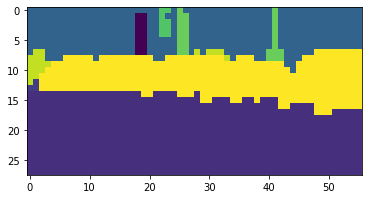

In [19]:
import matplotlib.pyplot as plt
plt.imshow(item['label'][0].numpy())

10 22:31:20 WRN Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


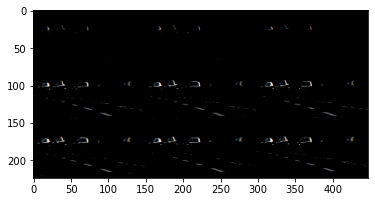

In [20]:
plt.imshow(item['data'][0].numpy().reshape(224,448,3))